In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
from IPython.display import  display
from PIL import Image
import re
import string
from numpy import array

In [2]:
import tensorflow as tf  
print(tf.__version__)    
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split
import cv2
import zipfile
from keras.preprocessing.image import img_to_array
import os
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from tensorflow.python.keras.layers.pooling import GlobalMaxPool2D
from pickle import load
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Add

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers.merge import add
from tensorflow.keras.callbacks import ModelCheckpoint


2.7.0


In [3]:
!wget https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_3/main/Flickr_8k.trainImages.txt

--2022-01-07 11:53:02--  https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_3/main/Flickr_8k.trainImages.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154678 (151K) [text/plain]
Saving to: ‘Flickr_8k.trainImages.txt.1’

Flickr_8k.trainImag 100%[===================>] 151.05K  --.-KB/s    in 0.02s   

2022-01-07 11:53:03 (6.80 MB/s) - ‘Flickr_8k.trainImages.txt.1’ saved [154678/154678]



In [11]:
! pip install kaggle
# !wget https://github.com/Nadiam75/DeepLearning_HW_3/blob/main/kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d adityajn105/flickr8k

 99% 1.03G/1.04G [00:06<00:00, 162MB/s]
100% 1.04G/1.04G [00:06<00:00, 176MB/s]


In [12]:
!unzip -q /content/flickr8k.zip

In [4]:
images_path = './Images/'
captions_path = 'captions.txt'

In [5]:
captions = open(captions_path, 'r').read().split("\n")

In [6]:
tokens = {}
for ix in range(len(captions)-1):
    temp = captions[ix].split(",")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][:])
    else:
        tokens[temp[0]] = [temp[1][:]]

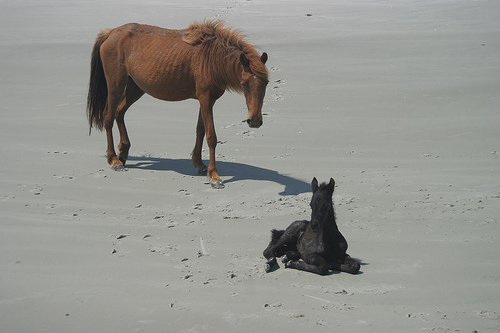

A brown horse and a black foal on the beach
A brown horse stands near a black horse that is sitting on the ground .
A large brown horse stands over a small black colt that is kneeling on the sand .
An adult horse approaching a foal on a sandy plain .
A thin brown horse standing and a small black horse sitting on sand .


In [7]:
temp = captions[1000].split(",")
z = Image.open(images_path+temp[0])
display(z)

for ix in range(len(tokens[temp[0]])):
    print(tokens[temp[0]][ix])

In [8]:
if 'image' in tokens.keys():
  del tokens['image']

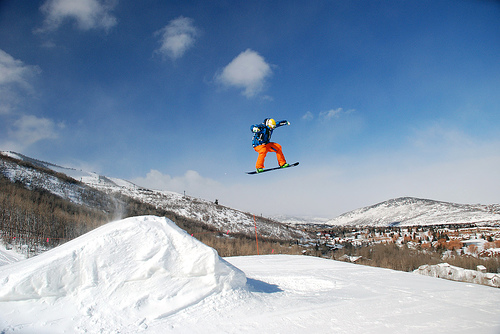

A man jumps off a ramp on a snowboard .
A snowboarder high in the air .
A snowboarder jumps through the air on their snowboard .
"Snowboarder flies off of snowy jump 
The snowboarder is in the middle of a very tall jump


In [9]:
temp = captions[6000].split(",")
z = Image.open(images_path+temp[0])
display(z)

for ix in range(len(tokens[temp[0]])):
    print(tokens[temp[0]][ix])

In [10]:
i = 0
for key, value in tokens.items():
  i+=1
  if i>5:
    break
  print(key)  
  print("***********************")
  for j in range(len(value)):
    print(value[j])
  # print(value)
  print("----------------------------------------------------------------------------------------")

1000268201_693b08cb0e.jpg
***********************
A child in a pink dress is climbing up a set of stairs in an entry way .
A girl going into a wooden building .
A little girl climbing into a wooden playhouse .
A little girl climbing the stairs to her playhouse .
A little girl in a pink dress going into a wooden cabin .
----------------------------------------------------------------------------------------
1001773457_577c3a7d70.jpg
***********************
A black dog and a spotted dog are fighting
A black dog and a tri-colored dog playing with each other on the road .
A black dog and a white dog with brown spots are staring at each other in the street .
Two dogs of different breeds looking at each other on the road .
Two dogs on pavement moving toward each other .
----------------------------------------------------------------------------------------
1002674143_1b742ab4b8.jpg
***********************
A little girl covered in paint sits in front of a painted rainbow with her hands in a 

In [11]:

# import string
 
# def clean_descriptions(descriptions):
# 	# prepare translation table for removing punctuation
# 	table = str.maketrans('', '', string.punctuation)
# 	for key, desc_list in descriptions.items():
# 		for i in range(len(desc_list)):
# 			desc = desc_list[i]
# 			# tokenize
# 			desc = desc.split()
# 			# convert to lower case
# 			desc = [word.lower() for word in desc]
# 			# remove punctuation from each token
# 			desc = [w.translate(table) for w in desc]
# 			# remove hanging 's' and 'a'
# 			desc = [word for word in desc if len(word)>1]
# 			# remove tokens with numbers in them
# 			desc = [word for word in desc if word.isalpha()]
# 			# store as string
# 			desc_list[i] =  ' '.join(desc)
 
# # clean descriptions
# clean_descriptions(descriptions)

In [12]:
def sentence_cleaning(sentence  ):
    sentence=sentence.lower()
    sentence=re.sub('[^a-z]+',' ',sentence)
    sentence=sentence.split()
    sentence=[s for s in sentence if len(s)>1]
    sentence=' '.join(sentence)
    return(sentence)

In [13]:
sentence_cleaning('Two dogs on pavement moving toward each other .' )

'two dogs on pavement moving toward each other'

In [14]:
sentence_cleaning('A young child is walking on 22 stones paved street with a metal pole and a man behind him .' )

'young child is walking on stones paved street with metal pole and man behind him'

In [15]:
i = 0
unique = set()
occurances = {}
clean_dictionary = {}
for key, value in tokens.items():
  for j in range(len(value)):
    if key in clean_dictionary:
      cleaned = sentence_cleaning(value[j] )
      clean_dictionary[key].append( cleaned)
    else:
      cleaned = sentence_cleaning(value[j] )
      clean_dictionary[key] = [cleaned]
    words = cleaned.split()

    for word in words:
      if word in occurances:
        occurances[word] += 1
      else:
        occurances[word] = 1
      unique.add(word)


In [16]:
tokens['934375844_dd149fed18.jpg']

['A baby in a white top is sitting on a bed .',
 '"A baby wearing a "" my best buddy "" shirt on a bed ."',
 'A cute baby boy is sitting on the bed looking very happy .',
 'A small baby sits on a bed and smiles .',
 'Small boy wearing blue shorts sitting on bed .']

In [17]:
clean_dictionary['934375844_dd149fed18.jpg']

['baby in white top is sitting on bed',
 'baby wearing my best buddy shirt on bed',
 'cute baby boy is sitting on the bed looking very happy',
 'small baby sits on bed and smiles',
 'small boy wearing blue shorts sitting on bed']

In [18]:
# unique_copy = unique.copy()

In [19]:
# counts = {}

# for key, value in clean_dictionary.items():
#   for j in range(len(value)):
    
#     words = value[j].split()
#     for word in words:
#       if word in counts :
#         counts [word] +=1
#       else:
#         counts[word] = 1

In [20]:
# def to_vocabulary(descriptions):
# 	# build a list of all description strings
# 	all_desc = set()
# 	for key in descriptions.keys():
# 		[all_desc.update(d.split()) for d in descriptions[key]]
# 	return all_desc

In [21]:
# vocabulary = to_vocabulary(clean_dictionary)
# print('Vocabulary Size: %d' % len(vocabulary))

In [22]:
cnt=0
low_occurance_dictionary = {}
# low_occurance_keys = []
for key, value in occurances.items():
  if value<10:
    cnt+=1
    low_occurance_dictionary[key] = value
    # low_occurance_keys.append(' '+key+ ' ')
    unique.remove(key)

In [23]:
len(unique)

1911

In [24]:
len(low_occurance_dictionary)

6346

In [25]:
# start_token = '<START> '
# end_token = ' <END>'
# pad_token = ' <PAD> '
# temp = r'(\s+' + r'\s+|\s+'.join(list(low_occurance_dictionary.keys())) + r'\s+)'
# # temp2 = ' '.join(list(low_occurance_dictionary.keys()))

In [26]:
start_token = '<STARTSEQUENCE> '
end_token = ' <ENDSEQUENCE>'
pad_token = ' <PADSEQUENCE> '


temp = r' | '.join(list(low_occurance_dictionary.keys()))

In [27]:
for i in range(3):
  for key, value in clean_dictionary.items():
    # print(key)
    for j in range(len(value)):

      value[j] = re.sub(temp, ' ' , value[j])
      value[j] = ' ' + value[j] + ' '

In [28]:
for key, value in clean_dictionary.items():
  # print(key)
  for j in range(len(value)):
    # value[j] = re.sub(temp, ' ' , value[j])
    value[j] = start_token + value[j] + end_token


In [29]:
for key, value in clean_dictionary.items():
  # print(key)
  for j in range(len(value)):
    value[j] = re.sub('\s+', ' ' , value[j])
    # value[j] = start_token + value[j] + end_token

In [30]:
i = 0
unique_prime = set()
occurances_prime = {}
for key, value in clean_dictionary.items():
  for j in range(len(value)):

    words = value[j].split()


    for word in words:
      if word in occurances_prime:
        occurances_prime[word] += 1
      else:
        occurances_prime[word] = 1
        unique_prime.add(word)

In [142]:
clean_dictionary['934375844_dd149fed18.jpg']

['<STARTSEQUENCE> baby in white top is sitting on bed <ENDSEQUENCE>',
 '<STARTSEQUENCE> baby wearing shirt on bed <ENDSEQUENCE>',
 '<STARTSEQUENCE> baby boy is sitting on the bed looking very happy <ENDSEQUENCE>',
 '<STARTSEQUENCE> small baby sits on bed and smiles <ENDSEQUENCE>',
 '<STARTSEQUENCE> small boy wearing blue shorts sitting on bed <ENDSEQUENCE>']

In [143]:
occurances_prime['<ENDSEQUENCE>']

40455

In [31]:
len(unique)

1911

In [32]:
len(unique_prime)

1913

In [33]:
i = 0
for key, value in clean_dictionary.items():
  i+=1
  if i>5:
    break
  print(key)  
  print("***********************")
  for j in range(len(value)):
    print(value[j])
    
  # print(value)
  print("----------------------------------------------------------------------------------------")

1000268201_693b08cb0e.jpg
***********************
<STARTSEQUENCE> child in pink dress is climbing up set of stairs in an way <ENDSEQUENCE>
<STARTSEQUENCE> girl going into wooden building <ENDSEQUENCE>
<STARTSEQUENCE> little girl climbing into wooden <ENDSEQUENCE>
<STARTSEQUENCE> little girl climbing the stairs to her <ENDSEQUENCE>
<STARTSEQUENCE> little girl in pink dress going into wooden <ENDSEQUENCE>
----------------------------------------------------------------------------------------
1001773457_577c3a7d70.jpg
***********************
<STARTSEQUENCE> black dog and spotted dog are fighting <ENDSEQUENCE>
<STARTSEQUENCE> black dog and tri colored dog playing with each other on the road <ENDSEQUENCE>
<STARTSEQUENCE> black dog and white dog with brown spots are staring at each other in the street <ENDSEQUENCE>
<STARTSEQUENCE> two dogs of different looking at each other on the road <ENDSEQUENCE>
<STARTSEQUENCE> two dogs on pavement moving toward each other <ENDSEQUENCE>
----------------

In [41]:
with open('Flickr_8k.trainImages.txt') as f:
    trainKeys = [line.rstrip() for line in f]

In [216]:
train = {} 
test = {}

for item , value in clean_dictionary.items():
  if item in trainKeys:
    
    train[item] = value
  else:
    test[item] = value

In [221]:
vggmodel = tf.keras.applications.VGG16( include_top= True , weights="imagenet",  input_tensor=None,  input_shape=None,   pooling=None,  classes=1000,   classifier_activation="softmax")# re-structure the model
vggmodel = Model(inputs=model.inputs, outputs=model.layers[-2].output  )
vggmodel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [222]:
# extract features from each photo in the directory
def encode(filename  , model ):
	# load the model

	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

In [ ]:
# encodedTrain = {} 
# decodedTrain = {}
# i = 0
# for key, value in train.items():
#   i+=1
#   if i%100 == 0:
#     print(i)
#   path = 'Images/' +key
#   encoded = encode(path , vggmodel )
#   encodedTrain[key] = encoded


In [153]:
# import pickle
# print('Extracted Train Features: %d' % len(encodedTrain))
# # save to file
# pickle.dump(encodedTrain, open('encodedTrain.pkl', 'wb'))

In [ ]:
# import pickle
# # save to file
# pickle.dump(decodedTrain, open('decodededTrain.pkl', 'wb'))

In [154]:
# encodedTest = {} 
# # decodedTest = {}
# i=0
# for key, value in test.items():
#   i+=1
#   if i%100 == 0:
#     print(i)
#   path = 'Images/' +key
#   encoded = encode(path, vggmodel)
#   encodedTest[key] = encoded
#   # decodedTest [encoded] = key

In [ ]:
# # save to file
# pickle.dump(decodedTest, open('decodedTest.pkl', 'wb'))

In [229]:
import pickle
file = open("./drive/MyDrive/train_features.pkl",'rb')
encodedTrain = pickle.load(file)

file = open("./drive/MyDrive/test_features.pkl",'rb')
encodedTest = pickle.load(file)

In [230]:
print('Extracted Test Features: %d' % len(encodedTest))


Extracted Test Features: 2091


In [231]:
print('Dataset: %d' % len(train))
print('Photos: train= %d' % len(encodedTrain))

Dataset: 6000
Photos: train= 6000


In [232]:
def load_photo_features(fileKey):
	if fileKey in encodedTrain:
		print(" feature found among train feautures")
		return encodedTrain[fileKey]
	elif fileKey in encodedTest:
		print(" feature found among test feautures")
		return encodedTest[fileKey]

In [233]:
# with open('saved_test_dictionary.pkl', 'wb') as f:
#     # pickle.dump(encodedTrain, f)
#     f.write(pickle.dumps(encodedTest))
    
        
# with open('saved_test_dictionary.pkl', 'rb') as f:
#     # encodedTrain = pickle.load(f)
#     encodedTest = pickle.loads(f.read())

In [50]:
train['1007320043_627395c3d8.jpg']

['<STARTSEQUENCE> child playing on rope net <ENDSEQUENCE>',
 '<STARTSEQUENCE> little girl climbing on red <ENDSEQUENCE>',
 '<STARTSEQUENCE> little girl in pink climbs rope bridge at the park <ENDSEQUENCE>',
 '<STARTSEQUENCE> small child onto the red ropes at the playground <ENDSEQUENCE>',
 '<STARTSEQUENCE> the small child climbs on red ropes on playground <ENDSEQUENCE>']

In [51]:
# # convert a dictionary of clean descriptions to a list of descriptions
# def tol(descriptions):
# 	all_desc = list()
# 	for key in descriptions.keys():
# 		[all_desc.append(d) for d in descriptions[key]]
# 	return all_desc

In [52]:
# # calculate the length of the description with the most words
# def max_length(descriptions):
# 	lines = tol(descriptions)
# 	return max(len(d.split()) for d in lines)
# max_length(train)

In [65]:
# convert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key , values in descriptions.items():
		[all_desc.append(d) for d in values]
	return all_desc

In [66]:
maximumLength = 0
for line in to_lines(train):
  
  length = len(line.split())
  if length> maximumLength:
    maximumLength = length 
print (f'maximum length is {maximumLength}')

maximum length is 29


In [67]:
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer(num_words=4000)
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [71]:
tokenizer = create_tokenizer(train)
vocab_size = len(tokenizer.word_index) +1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 1914


In [73]:
len(tokenizer.word_index)

1913

In [55]:
# tokenizer = create_tokenizer(unique)
# vocab_size = len(tokenizer.word_index) + 1
# print('Vocabulary Size: %d' % vocab_size)

In [57]:
# # create sequences of images, input sequences and output words for an image
# def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
# 	X1, X2, y = list(), list(), list()
# 	# walk through each image identifier
# 	for key, desc_list in descriptions.items():
# 		# walk through each description for the image
# 		for desc in desc_list:
# 			# encode the sequence
# 			seq = tokenizer.texts_to_sequences([desc])[0]
# 			# split one sequence into multiple X,y pairs
# 			for i in range(1, len(seq)):
# 				# split into input and output pair
# 				in_seq, out_seq = seq[:i], seq[i]
# 				# pad input sequence
# 				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
# 				# encode output sequence
# 				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
# 				# store
# 				X1.append(photos[key][0])
# 				X2.append(in_seq)
# 				y.append(out_seq)
# 	return array(X1), array(X2), array(y)

In [240]:
X1_train, X2_train, y_train = list(), list(), list()
# walk through each image identifier
i = 0
for key, desc_list in train.items():
  # walk through each description for the image
  for desc in desc_list:
    seq = tokenizer.texts_to_sequences([desc])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
      in_seq, out_seq = seq[:i], seq[i]
      in_seq = pad_sequences([in_seq], maxlen=maximumLength)[0]
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
      X1_train.append(encodedTrain[key][0])
      X2_train.append(in_seq)
      y_train.append(out_seq)

In [241]:
X1_test, X2_test, y_test = list(), list(), list()
# walk through each image identifier
i = 0
for key, desc_list in test.items():
  # walk through each description for the image
  for desc in desc_list:
    seq = tokenizer.texts_to_sequences([desc])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
      in_seq, out_seq = seq[:i], seq[i]
      in_seq = pad_sequences([in_seq], maxlen=maximumLength)[0]
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
      X1_test.append(encodedTest[key][0])
      X2_test.append(in_seq)
      y_test.append(out_seq)

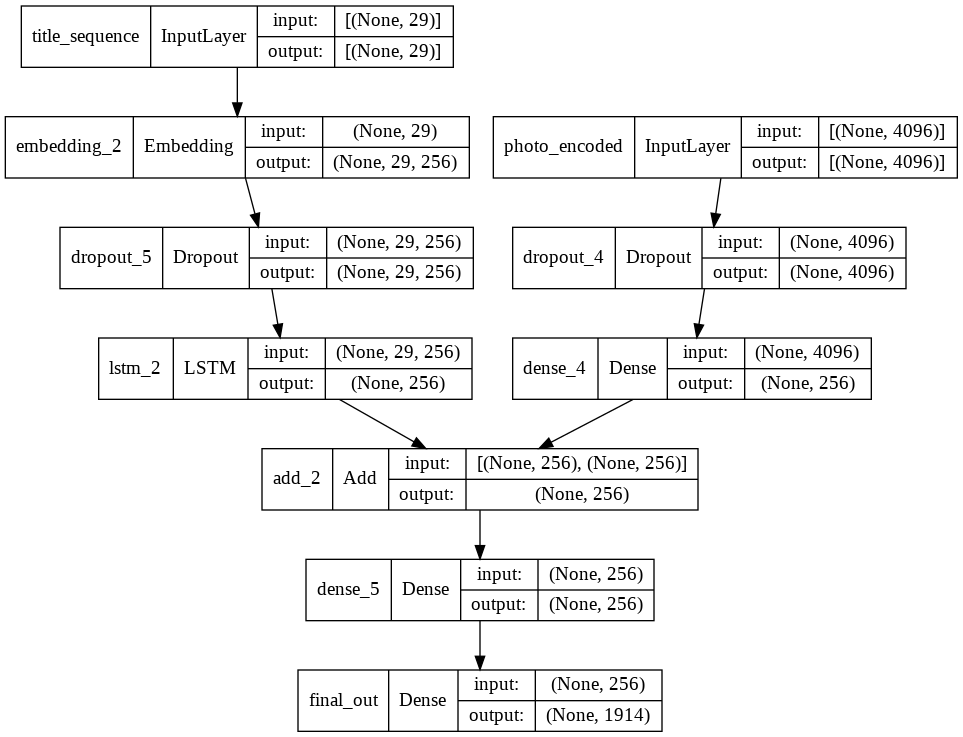

In [324]:
# define the captioning model
# def define_model(vocab_size, max_length):
	# feature extractor model
inputs1 = Input(shape=(4096,)  , name="photo_encoded")
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence model
inputs2 = Input(shape=(maximumLength,) , name= "title_sequence")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
# decoder model
# decoder1 = Add([fe2, se3])
decoder1  = tf.keras.layers.Add()([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax' , name="final_out")(decoder2)
# tie it together [image, seq] [word]
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')
# summarize model
# print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)
	# return model

In [254]:
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [255]:
# train_zipped = zip(X1_train, X2_train)
# zipped_train_list = list(train_zipped)

In [256]:
# test_zipped = zip(X1_test, X2_test)
# zipped_test_list = list(test_zipped)

In [257]:
# len(X1_train), len(X2_train) , len(y_train) , len(X1_test ) , len(X2_test) , len(y_test) , len (zipped_train_list) , len (zipped_test_list)

In [258]:
len(X1_train), len(X2_train) , len(y_train) , len(X1_test ) , len(X2_test) , len(y_test) 

(284062, 284062, 284062, 98852, 98852, 98852)

In [259]:
# np.array(X1_train).shape ,np.array(X2_train).shape , np.array(y_train).shape

In [260]:
# np.array(X1_test).shape ,np.array(X2_test).shape , np.array(y_test).shape

In [261]:
datacount = 284062

In [262]:
X1_train = tf.stack(X1_train[:datacount])
X2_train = tf.stack(X2_train[:datacount])
y_train = tf.stack(y_train[:datacount])
X1_test = tf.stack(X1_test[:datacount])
X2_test = tf.stack(X2_test[:datacount])
y_test = tf.stack(y_test[:datacount])

In [325]:
# # fit model
# model.fit( {"photo_encoded": X1_train, "title_sequence": X2_train } , {'final_out' : y_train}, epochs=20,  batch_size=32 ,  verbose=1,  validation_data= (    {"photo_encoded": X1_test, "title_sequence": X2_test } , {'final_out' : y_test } ) )
model.fit( {"photo_encoded": X1_train, "title_sequence": X2_train } , {'final_out' : y_train}, epochs=7, callbacks=[checkpoint] , batch_size=1024 ,  verbose=1 , validation_data= (    {"photo_encoded": X1_test, "title_sequence": X2_test } , {'final_out' : y_test } ) ) 

Epoch 1/7
278/278 [==============================] - ETA: 0s - loss: 4.5388
Epoch 00001: val_loss did not improve from 3.34932
278/278 [==============================] - 67s 223ms/step - loss: 4.5388 - val_loss: 3.8137
Epoch 2/7
278/278 [==============================] - ETA: 0s - loss: 3.4524
Epoch 00002: val_loss did not improve from 3.34932
278/278 [==============================] - 59s 213ms/step - loss: 3.4524 - val_loss: 3.5012
Epoch 3/7
278/278 [==============================] - ETA: 0s - loss: 3.1379
Epoch 00003: val_loss did not improve from 3.34932
278/278 [==============================] - 59s 214ms/step - loss: 3.1379 - val_loss: 3.3940
Epoch 4/7
278/278 [==============================] - ETA: 0s - loss: 2.9456
Epoch 00004: val_loss did not improve from 3.34932
278/278 [==============================] - 59s 214ms/step - loss: 2.9456 - val_loss: 3.3647
Epoch 5/7
278/278 [==============================] - ETA: 0s - loss: 2.8109
Epoch 00005: val_loss improved from 3.34932 to 3

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


278/278 [==============================] - ETA: 0s - loss: 2.7038
Epoch 00006: val_loss did not improve from 3.33924
278/278 [==============================] - 60s 216ms/step - loss: 2.7038 - val_loss: 3.3462
Epoch 7/7
278/278 [==============================] - ETA: 0s - loss: 2.6200
Epoch 00007: val_loss did not improve from 3.33924
278/278 [==============================] - 60s 217ms/step - loss: 2.6200 - val_loss: 3.3576


In [326]:
def word_for_id(integer, tokenizer):
	# for word, index in tokenizer.word_index.items():
	# 	if index == integer:
	# 		return word

  dictionary = tokenizer.index_word
  return dictionary[integer]

	# return None

In [327]:
def generate_description ( model , tokenizer , photo , max_length):
  in_text = start_token
  for i in range(max_length):

    sequence = tokenizer.texts_to_sequences([in_text])[0]
    # print(sequence)
    sequence = pad_sequences([sequence] , maxlen = max_length)
    # sequence = tf.stack(sequence)
    # print(sequence)
    # return sequence

    yhat = model.predict( {'photo_encoded' : photo , 'title_sequence' : sequence  } , verbose= 0)
    yhat = np.argmax(yhat)
    word = word_for_id ( yhat , tokenizer)
    if word is None :
      break
    in_text += ' ' + word
    if word == 'endsequence' :
      break
  return in_text

In [328]:
def find_image (  vectorRepresentation , test):
  if test :
    for item , value in encodedTest.items():
      # print(type(vectorRepresentation))
      if (value == vectorRepresentation.numpy()).all():
        return item
  else :  
    for item , value in encodedTrain.items():
      # print(type(vectorRepresentation))

      if (value == vectorRepresentation.numpy()).all():
        return item

<STARTSEQUENCE>  two children are playing in the water endsequence


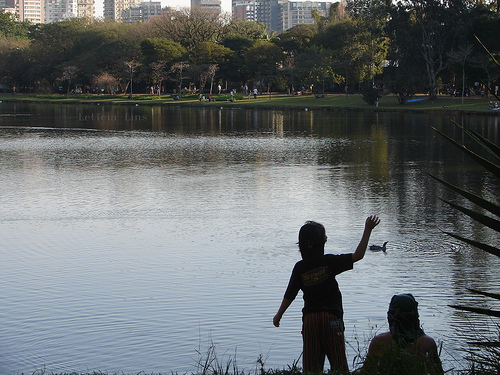

In [329]:
photo = X1_test [13]
photo = tf.reshape(photo, [1 , 4096])
print(generate_description(model, tokenizer, photo, 29))
img =  find_image ( photo , 1)
z = Image.open(images_path+img)
display(z)


<STARTSEQUENCE>  black dog is jumping over the grass endsequence


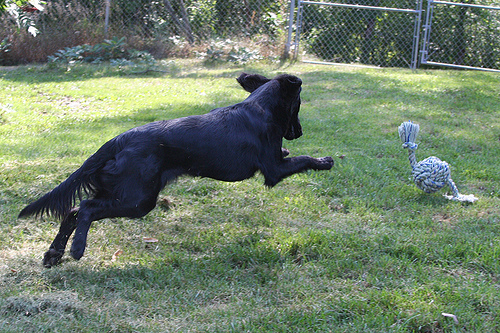

In [340]:
photo = X1_test [999]
photo = tf.reshape(photo, [1 , 4096])
print(generate_description(model, tokenizer, photo, 29))
img =  find_image ( photo , 1)
z = Image.open(images_path+img)
display(z)


<STARTSEQUENCE>  black dog is jumping over the grass endsequence


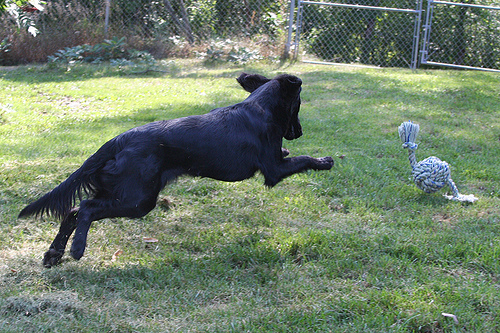

In [339]:
photo = X1_test [1000]
photo = tf.reshape(photo, [1 , 4096])
print(generate_description(model, tokenizer, photo, 29))
img =  find_image ( photo , 1)
z = Image.open(images_path+img)
display(z)


<STARTSEQUENCE>  woman in black and white dress is walking on busy street endsequence


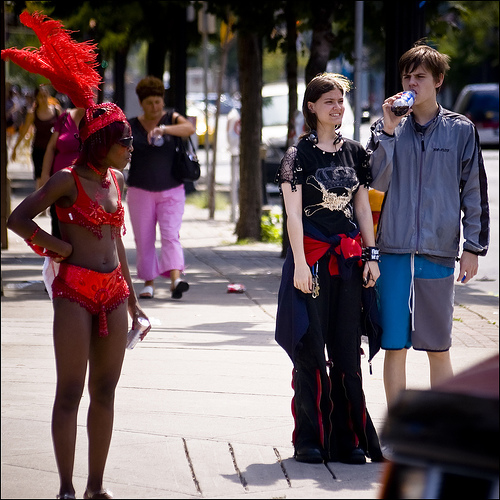

In [338]:
photo = X1_test [777]
photo = tf.reshape(photo, [1 , 4096])
print(generate_description(model, tokenizer, photo, 29))
img =  find_image ( photo , 1)
z = Image.open(images_path+img)
display(z)


<STARTSEQUENCE>  two young boys are smiling and holding paper endsequence


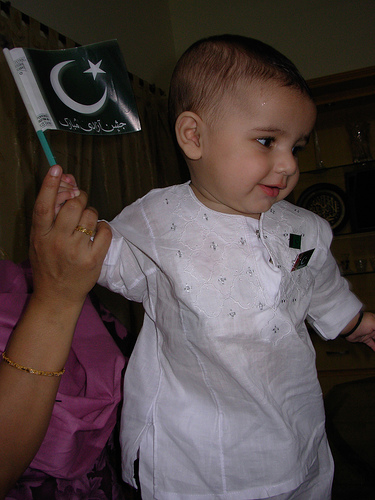

In [343]:
photo = X1_test [1111]
photo = tf.reshape(photo, [1 , 4096])
print(generate_description(model, tokenizer, photo, 29))
img =  find_image ( photo , 1)
z = Image.open(images_path+img)
display(z)
